# Ekvalizace histogramu

In [9]:
import matplotlib.pyplot as plt
import cv2

In [10]:
DATA_PATH = f'../../Results/Resizing_Images/Images_ALL/2023_12_14_image_000.png'

img = cv2.imread(DATA_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
def plot_images(img_ori,img_fil, title):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

    ax1.title.set_text('Original image')
    ax1.imshow(img_ori)

    ax2.title.set_text(f'{title}')
    ax2.imshow(img_fil)

    plt.show()

In [12]:
img_Lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(img_Lab)

img_HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(img_HSV)

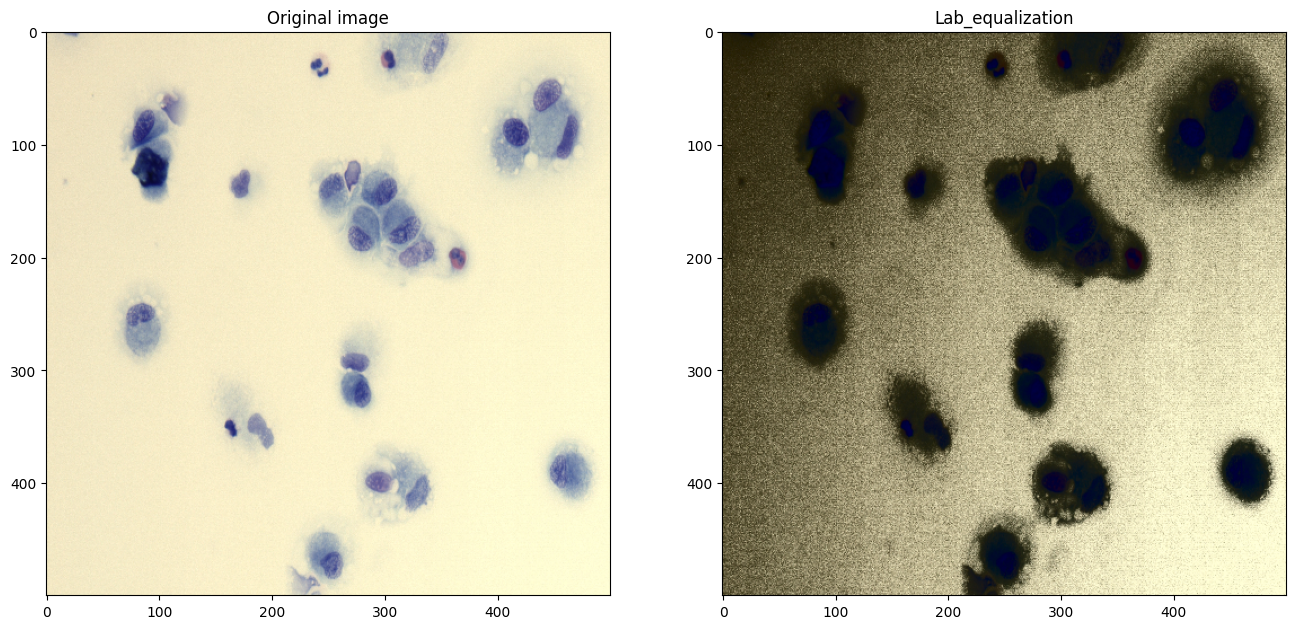

In [13]:
equ = cv2.equalizeHist(L)
img_filtered = cv2.merge((equ, a, b))
img_filtered = cv2.cvtColor(img_filtered, cv2.COLOR_LAB2RGB)

plot_images(img,img_filtered,'Lab_equalization')

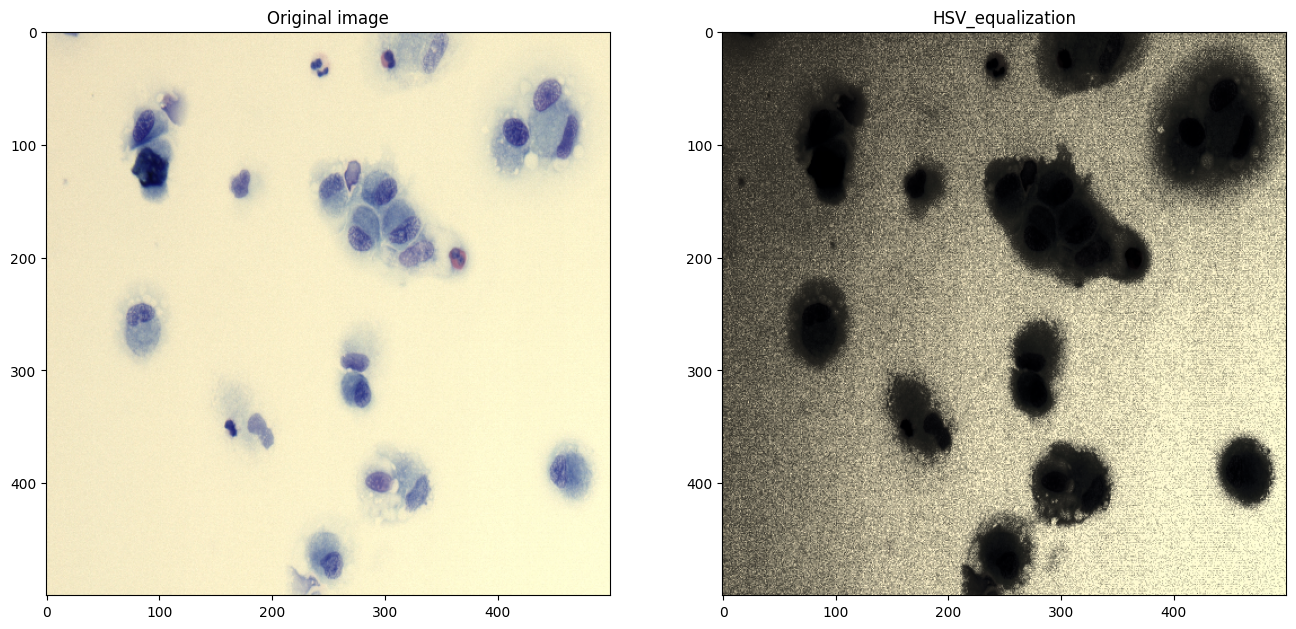

In [14]:
equ = cv2.equalizeHist(V)
img_filtered = cv2.merge((H, S, equ))
img_filtered = cv2.cvtColor(img_filtered, cv2.COLOR_HSV2RGB)

plot_images(img,img_filtered,'HSV_equalization')

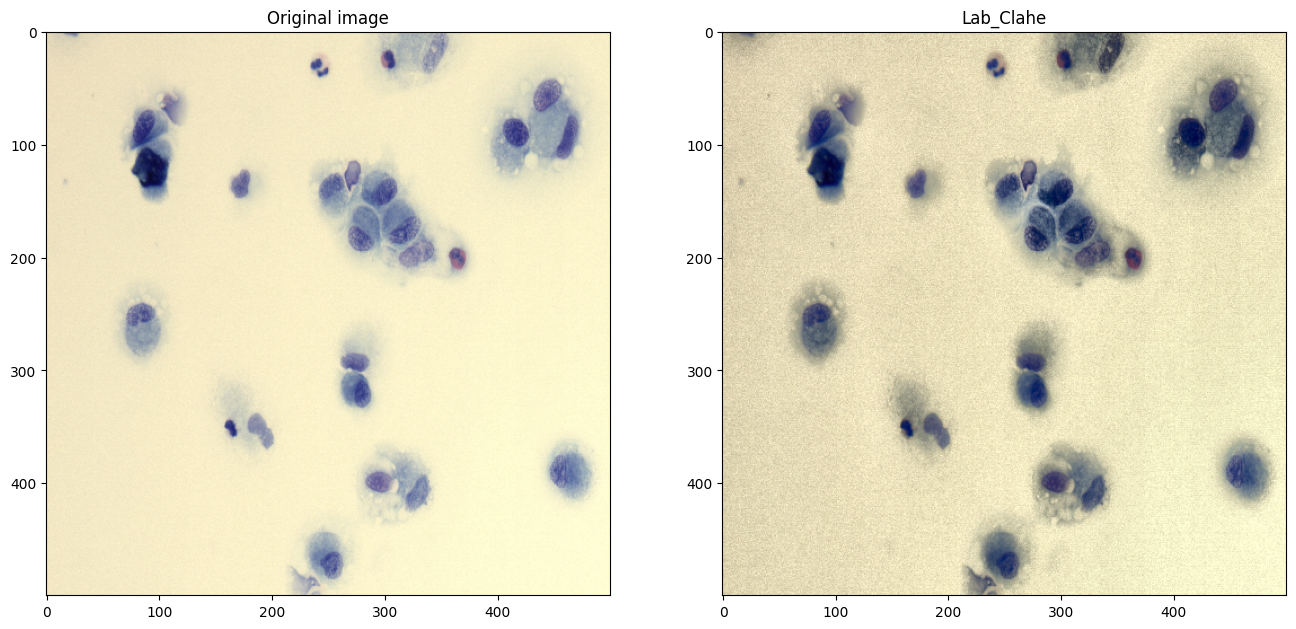

In [15]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
equ = clahe.apply(L)
img_filtered = cv2.merge((equ, a, b))
img_filtered = cv2.cvtColor(img_filtered, cv2.COLOR_LAB2RGB)

plot_images(img,img_filtered,'Lab_Clahe')

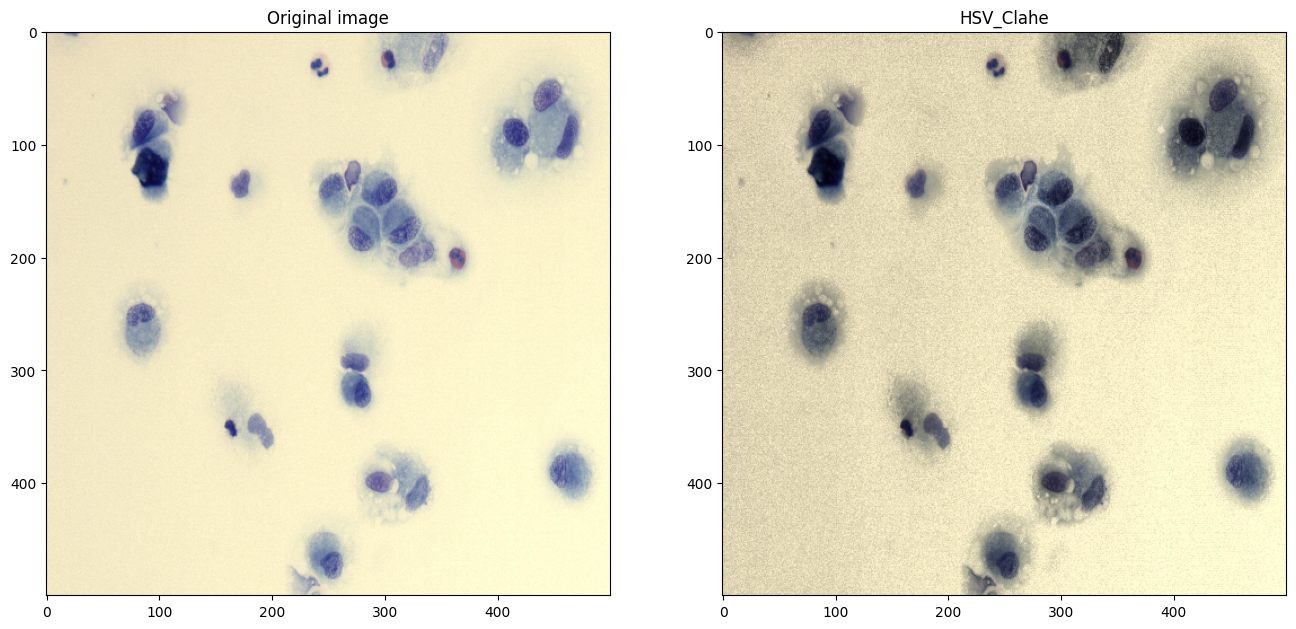

In [16]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
equ = clahe.apply(V)
img_filtered = cv2.merge((H, S, equ))
img_filtered = cv2.cvtColor(img_filtered, cv2.COLOR_HSV2RGB)

plot_images(img,img_filtered,'HSV_Clahe')       